# Baseball Analysis

### Introduction

Today, baseball is more than just a game. It isn’t just a sport for me. It is a way to see how much of an impact data analytics could have in sports and business. But this isn’t anything new. Since Bill James first coined the concept of [sabermetrics](https://en.wikipedia.org/wiki/Sabermetrics) in the 1980s, we now look at a baseball in a different approach. Analysts look at every piece of baseball data available in order to determine the future success or production of baseball players. They now look at on-base percentage (OBP), slugging percentage (SLG), total bases (TB), runs created (RC), and the list goes on. 

However, this was not always the case. For decades, baseball fans have relied heavily on 3 stats to rate players: Batting Average (BA), Runs Batted In (RBI), and Home Runs (HR). And surprisingly, it isn’t our fault. Various sports media outlets have maintain these stats as the main focus in determining baseball performance. 


For my baseball analysis, I want to use the data we have available today to look at an embarrassing period of professional baseball: the Steroid Era. Mark McGwire, Barry Bonds, and Sammy Sosa were among some of the best players throughout the 1990s. They led the league in different categories and were chasing historic baseball records. In 1997, McGwire and Sosa entered a close race for most single season home runs, with McGwire beating the record with 70 home runs. Three seasons later, Bonds would top that and finish with 73 home runs. Although these players had successful careers, they have since been seen as frauds. These players were known for their use of performance enhancement drugs. But they were not alone. Various players throughout the league during that era used these anabolic steroids to increase their production.

With this comes my analysis question: **Were hitters during the Steroid Era better than hitters of today’s baseball?**

My hypothesis is that players during Steroid Era had a bigger impact on scoring runs than players during the Modern Era.

### Cleaning the Data

The data I will be using is from [Sean Lahman’s baseball database](http://www.seanlahman.com/baseball-database.html). The data includes all MLB statistics from the past 100 years. However, we will be analyzing data from the height of the Steroid Era (1990) to the most recent data available (2016). To do this, I will divide the data into two different data sets. So when did the Steroid Era end? That's probably a discussion for another time. Since we are only comparing hitting during the two eras, the data only includes batting statistics for all individual players.

In [2]:
import pandas as pd
import numpy as np

### Load Data
all_batting = pd.read_csv('Batting.csv')

In [3]:
all_batting.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,NaN


Looking at the raw data, we can tell it needs some work. 

For this analysis, we need to determine the two eras. Steroids were first banned in [1990](http://www.espn.com/mlb/topics/_/page/the-steroids-era), so we will use that year as the start. For the end of the era, we will consider the last major steroid user: Alex Rodriguez. In February 2009, Rodriguez [admitted to using steroids](http://www.espn.com/mlb/news/story?id=3890785) during his career with the most recent year being 2003. Therefore, I will make the end of the Steroid Era in 2003. For the "Modern Era", we will analyze all data after 2003. In this case, all baseball data up to 2016.

In [4]:
# Set the date range for the Steroid Era
steroid_years = list(range(1990,2004))

# Create a data set with all hitting statistics from the era we want to analyze
steroid = all_batting[['playerID','yearID','teamID','G','AB','R','H', 'HR', 'RBI','BB','2B', '3B', 'HBP', 'SF']]
steroid = steroid[steroid['yearID'].isin(steroid_years)]

steroid.head()

,playerID,yearID,teamID,G,AB,R,H,HR,RBI,BB,2B,3B,HBP,SF
67410,aasedo01,1990,LAN,32,0,0,0,0,0.0,0,0,0,0.0,0.0
67411,abbotji01,1990,CAL,33,0,0,0,0,0.0,0,0,0,0.0,0.0
67412,abbotpa01,1990,MIN,7,0,0,0,0,0.0,0,0,0,0.0,0.0
67413,abnersh01,1990,SDN,91,184,17,45,1,15.0,9,9,0,2.0,1.0
67414,ackerji01,1990,TOR,59,0,0,0,0,0.0,0,0,0,0.0,0.0


Next step in our data cleaning process, we want all individual statistics by year. When a trade occured, the data would split the stats of the player for both teams. For example, in 1997, Mark McGwire was traded from the Oakland A's to the St.Louis Cardinals. Below, you can see that he has two entries for 1997, one for the A's and one for the Cardinals:

In [5]:
steroid[steroid['playerID'] == 'mcgwima01']

,playerID,yearID,teamID,G,AB,R,H,HR,RBI,BB,2B,3B,HBP,SF
68062,mcgwima01,1990,OAK,156,523,87,123,39,108.0,110,16,0,7.0,9.0
69175,mcgwima01,1991,OAK,154,483,62,97,22,75.0,93,22,0,3.0,5.0
70236,mcgwima01,1992,OAK,139,467,87,125,42,104.0,90,22,0,5.0,9.0
71370,mcgwima01,1993,OAK,27,84,16,28,9,24.0,21,6,0,1.0,1.0
72453,mcgwima01,1994,OAK,47,135,26,34,9,25.0,37,3,0,0.0,0.0
73611,mcgwima01,1995,OAK,104,317,75,87,39,90.0,88,13,0,11.0,6.0
74863,mcgwima01,1996,OAK,130,423,104,132,52,113.0,116,21,0,8.0,1.0
76122,mcgwima01,1997,OAK,105,366,48,104,34,81.0,58,24,0,4.0,5.0
76123,mcgwima01,1997,SLN,51,174,38,44,24,42.0,43,3,0,5.0,2.0
77389,mcgwima01,1998,SLN,155,509,130,152,70,147.0,162,21,0,6.0,4.0


Therefore, we want to combine the data to analyze each individual player by year. Also, we only want to consider players that played a significant amount of games. There are 162 games during the MLB season. We will analyze players that played at least 100 games during the year, which is more than half a season of baseball.

In [6]:
# Combine player stats by year
steroid = steroid.groupby(['playerID', 'yearID'], as_index = False).sum()

# Data from players that played at least 100 games
steroid = steroid[steroid['G'] > 100]
steroid.head()

,playerID,yearID,G,AB,R,H,HR,RBI,BB,2B,3B,HBP,SF
18,abbotku01,1994,101,345,41,86,9,33.0,16,17,3,5.0,2.0
19,abbotku01,1995,120,420,60,107,17,60.0,36,18,7,5.0,5.0
20,abbotku01,1996,109,320,37,81,8,33.0,22,18,7,3.0,0.0
41,abernbr01,2002,117,463,46,112,2,40.0,25,18,4,6.0,2.0
48,abreubo01,1998,151,497,68,155,17,74.0,84,29,6,0.0,4.0


The data we are given does not have any of the modern sabermetrics stats. However, the more common sabermetrics stats can be calculated using some of the stats on our data set. For our analysis, we will calculate on-base percentage (OBP), slugging percentage (SLG), on-base percentage plus slugging (OPS), and total bases (TB). The data also does not (surprisingly) having batting average (AVG), so we'll calculate that as well.

In [7]:
# Calculate additional baseball stats
steroid['AVG'] = round((steroid['H'] / steroid['AB']),3)
steroid['TB'] = ((steroid['2B']*2) + (steroid['3B']*3) + (steroid['HR']*4) + (steroid['H'] - steroid['HR'] - steroid['3B'] - steroid['2B']))
steroid['OBP'] = round((steroid['H'] + steroid['BB'] + steroid['HBP']) / (steroid['AB'] + steroid['BB'] + steroid['HBP'] + steroid['SF']), 3)
steroid['SLG'] = round((steroid['TB'] / steroid['AB']), 3)
steroid['OPS'] = round((steroid['OBP'] + steroid['SLG']), 3)

Missing data is crucial in performing any analysis. Here, we need to find any missing data and replace it with the mean.

In [8]:
# Replace missing data with mean of stat
steroid['OBP'] = steroid['OBP'].replace(np.nan, round(steroid['OBP'].mean(),3))
steroid['SLG'] = steroid['SLG'].replace(np.nan, round(steroid['SLG'].mean(),3))
steroid['OPS'] = steroid['OPS'].replace(np.nan, round(steroid['OPS'].mean(),3))
steroid['HBP'] = steroid['HBP'].replace(np.nan, round(steroid['HBP'].mean(),0))
steroid['SF'] = steroid['SF'].replace(np.nan, round(steroid['SF'].mean(),0))

steroid.head()

,playerID,yearID,G,AB,R,H,HR,RBI,BB,2B,3B,HBP,SF,AVG,TB,OBP,SLG,OPS
18,abbotku01,1994,101,345,41,86,9,33.0,16,17,3,5.0,2.0,0.249,136,0.291,0.394,0.685
19,abbotku01,1995,120,420,60,107,17,60.0,36,18,7,5.0,5.0,0.255,190,0.318,0.452,0.770
20,abbotku01,1996,109,320,37,81,8,33.0,22,18,7,3.0,0.0,0.253,137,0.307,0.428,0.735
41,abernbr01,2002,117,463,46,112,2,40.0,25,18,4,6.0,2.0,0.242,144,0.288,0.311,0.599
48,abreubo01,1998,151,497,68,155,17,74.0,84,29,6,0.0,4.0,0.312,247,0.409,0.497,0.906


Now, we do the same data cleaning process to the Modern Era data.

In [9]:
# Set the date range for the Steroid Era
modern_years = list(range(2004,2017))

# Create a data set with all hitting statistics from the era we want to analyze.
modern = all_batting[['playerID','yearID','teamID','G','AB','R','H', 'HR', 'RBI','BB','2B', '3B', 'HBP', 'SF']]
modern = modern[modern['yearID'].isin(modern_years)]

modern = modern.groupby(['playerID', 'yearID'], as_index = False).sum()
modern = modern[modern['G'] > 100]


# Calculate additional baseball stats
modern['AVG'] = round((modern['H'] / modern['AB']),3)
modern['TB'] = ((modern['2B']*2) + (modern['3B']*3) + (modern['HR']*4) + (modern['H'] - modern['HR'] - modern['3B'] - modern['2B']))
modern['OBP'] = round((modern['H'] + modern['BB'] + modern['HBP']) / (modern['AB'] + modern['BB'] + modern['HBP'] + modern['SF']), 3)
modern['SLG'] = round((modern['TB'] / modern['AB']), 3)
modern['OPS'] = round((modern['OBP'] + modern['SLG']), 3)


# Replace missing data with mean of stat
modern['OBP'] = modern['OBP'].replace(np.nan, round(modern['OBP'].mean(),3))
modern['SLG'] = modern['SLG'].replace(np.nan, round(modern['SLG'].mean(),3))
modern['OPS'] = modern['OPS'].replace(np.nan, round(modern['OPS'].mean(),3))
modern['HBP'] = modern['HBP'].replace(np.nan, round(modern['HBP'].mean(),0))
modern['SF'] = modern['SF'].replace(np.nan, round(modern['SF'].mean(),0))

### Analysis

Let's visualize our data using both Bokeh and matplotlib. To make the plots more organized, we will only be looking at the top 100 players of both data sets, based on total runs scored.

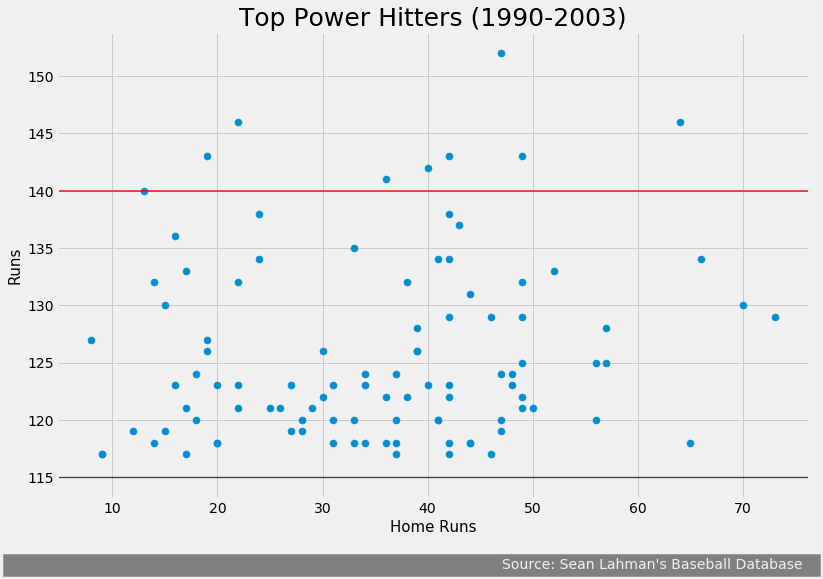

In [20]:
import matplotlib.pyplot as plt
import matplotlib.style as style

style.use('fivethirtyeight')
top_steroid.plot(kind = 'scatter', x = 'HR', y = 'R', s= 50, alpha = 1, figsize = (12,8))
plt.title('Top Power Hitters (1990-2003)', size = 25)
plt.xlabel('Home Runs', size = 15)
plt.ylabel('Runs', size = 15)
plt.axhline(y = 140, color = 'red', linewidth = 2, alpha = 0.7)
plt.axhline(y = 115, color = 'black', linewidth = 1.3, alpha = 0.7)

# The signature bar
plt.text(x = 0, y = 107,
    s = '                                                                                                              Source: Sean Lahman\'s Baseball Database   ',
    fontsize = 14, color = '#f0f0f0', backgroundcolor = 'grey')

plt.show();

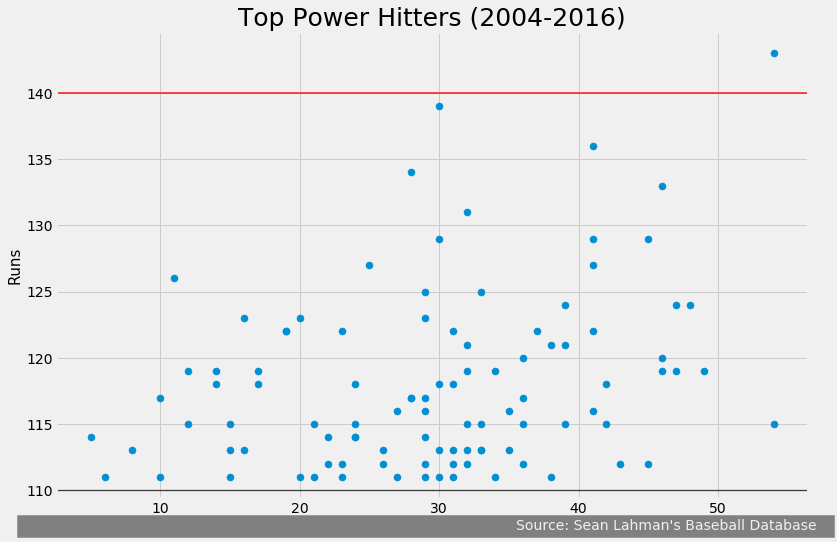

In [13]:
style.use('fivethirtyeight')
top_modern.plot(kind = 'scatter', x = 'HR', y = 'R', s= 50, alpha = 1, figsize = (12,8))
plt.title('Top Power Hitters (2004-2016)', size = 25)
plt.xlabel('Home Runs', size = 15)
plt.ylabel('Runs', size = 15)
plt.axhline(y = 140, color = 'red', linewidth = 2, alpha = 0.7)
plt.axhline(y = 110, color = 'black', linewidth = 1.3, alpha = 0.7)

# The signature bar
plt.text(x = 0, y = 107,
    s = '                                                                                                              Source: Sean Lahman\'s Baseball Database   ',
    fontsize = 14, color = '#f0f0f0', backgroundcolor = 'grey')

plt.show();

After analyzing both graphs, we can already tell that the top players in the Steroid Era have better individual stats. For example, during the steroid era, there were 9 players that ended a season with at least 140 runs. In the modern era, there was only 1. Although this may convince some to conclude that players during the steroid era were better, we need to dig deeper.

Now, let’s analyze using the sabermetrics stats we calculated earlier. To do this, we’ll created a function that returns a scatter plot for each stat that we calculated: batting average (AVG), on-base percentage (OBP), slugging percentage (SLG), and on-base percentage plus slugging (OPS). Although batting average might not be an important sabermetric stat in modern baseball, we will still analyze it since it was a huge factor in the steroid era of baseball.

The correlation between average AVG and R is 0.561
The correlation between average OPS and R is 0.669
The correlation between average OBP and R is 0.601
The correlation between average SLG and R is 0.629


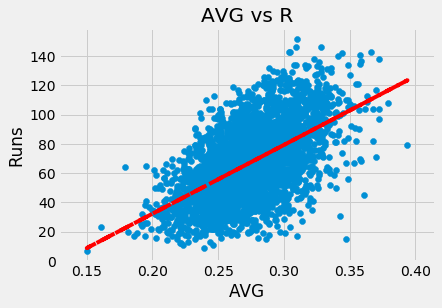

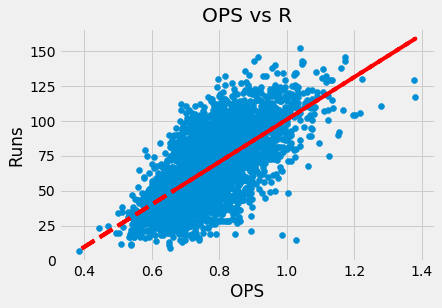

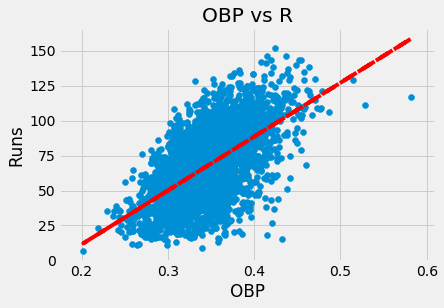

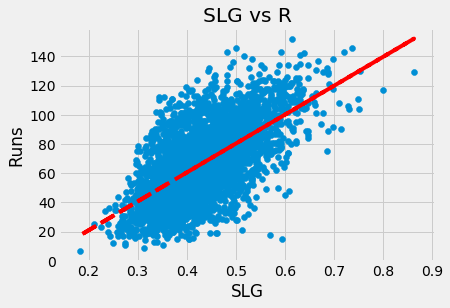

In [14]:
### Create function that returns scatter plot for a list of baseball stats compared to Runs. Also returns correlation of each stat vs Runs
def runs_analysis(data, statistics):
    for stat in statistics:
        t = 'R'
        x = data[stat]
        y = data[t]
        plt.figure()
        plt.scatter(x,y)
        plt.title('{} vs {}'.format(stat,t))
        plt.ylabel('Runs')
        plt.xlabel('{}'.format(stat))
        z = np.polyfit(x, y, 1)
        p = np.poly1d(z)
        plt.plot(x, p(x), 'r--')
        print('The correlation between average {} and {} is {:0.3f}'.format(stat, t, data.corr()[stat][t]))



stats = ['AVG','OPS','OBP', 'SLG']

runs_analysis(steroid, stats)

The [correlation]( https://en.wikipedia.org/wiki/Correlation_and_dependence) measures of how linearly dependent two variables are to one another. Here we are using correlation value to determine whether one correlation is stronger than another. As expected, all three of the performance metrics were positively correlated with runs. OPS had the highest correlation value during the Steroid Era, and AVG was, [unsurprisingly]( https://www.fangraphs.com/library/stats-to-avoid-batting-average/), the lowest.

Next, we’ll run the same function with the Modern Era data. 

The correlation between average AVG and R is 0.541
The correlation between average OPS and R is 0.656
The correlation between average OBP and R is 0.578
The correlation between average SLG and R is 0.617


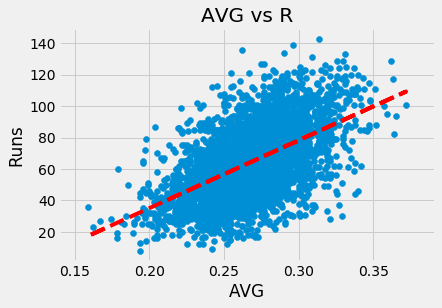

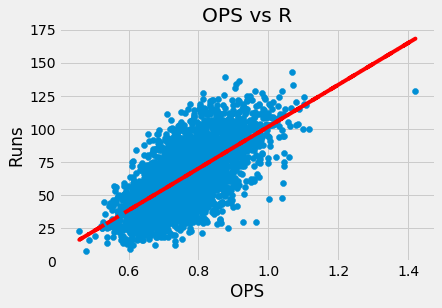

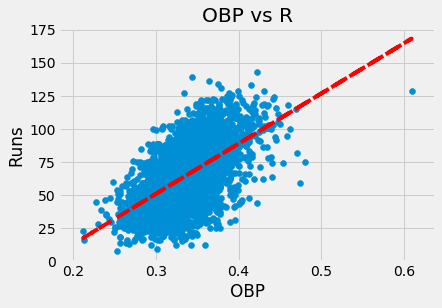

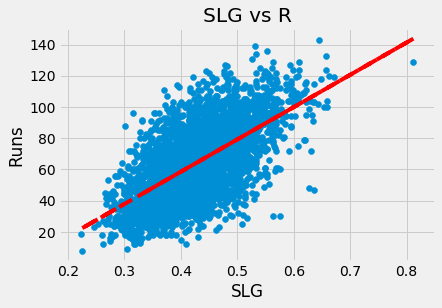

In [15]:
runs_analysis(modern, stats)

The correlation between the average performance metrics from the Steroid Era of baseball and runs is greater than that between the average performance metrics of the Modern Era. This implies that hitters during the Steroid Era were better at scoring runs than players during the Modern Era.

### Conclusion

From our quick analysis, we can see that hitters during the Steroid Era performed better at scoring runs than players during the Modern Era. However, there are various factors that might hinder our analysis. First, we did not take into consideration the various ballpark characteristics that might affect the amount of runs scored. For example, in today’s sabermetric analysis, a home ballpark might generate more runs for the home team. This must need to be taken into consideration to try and predict performance metrics. Another factor we did not discuss in this analysis was pitching performance. Pitching is just as important to baseball success as hitting. 

Overall, this analysis was to simply demonstrate the importance of using data analysis to look at baseball in a different way. 
